In [1]:
# №1
group_a = [4, 8, 9, 2]
group_b = [3, 10, 11, 3]

# для интервального ряда можно выбрать "опорные точки" -- среднее граничных значений
centers = [90, 70, 50, 30] 

# средний балл
mean_a = (1/sum(group_a)) * sum([c * m for c, m in zip(centers, group_a)])
mean_b = (1/sum(group_b)) * sum([c * m for c, m in zip(centers, group_b)])

# разброс
var_a = (1/sum(group_a)) * sum([(c1 - mean_a) ** 2 * c2 for c1, c2 in zip(centers, group_a)])
var_b = (1/sum(group_b)) * sum([(c1 - mean_b) ** 2 * c2 for c1, c2 in zip(centers, group_b)])

if mean_a > mean_b: 
    print('Средний балл больше в группе А')
elif mean_a < mean_b: 
    print('Средний балл больше в группе B ')
    
if var_a < var_b: 
    print('Разброс результатов меньше в группе А')
elif var_a > var_b: 
    print('Разброс результатов меньше в группе B')

Средний балл больше в группе А
Разброс результатов меньше в группе B


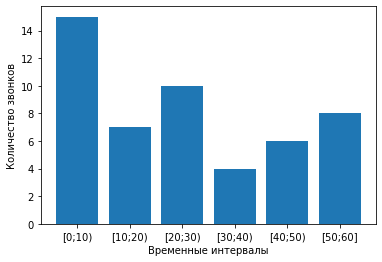

Выборочное среднее: 25.6
СКО: 18.265815065307105


In [2]:
# 2
import numpy as np
import matplotlib.pyplot as plt

intervals = ['[0;10)', '[10;20)', '[20;30)', '[30;40)', '[40;50)', '[50;60]']

centers = [5, 15, 25, 35, 45, 55]
calls = [15, 7, 10, 4, 6, 8]

plt.bar(intervals, calls)
plt.xlabel('Временные интервалы') 
plt.ylabel('Количество звонков') 
plt.show() 

# среднее
mean = (1/sum(calls)) * sum([c1 * c2 for c1, c2 in zip(centers, calls)])

# СКО 
sigma = np.sqrt((1/sum(calls)) * sum([(c1 - mean) ** 2 * c2 for c1, c2 in zip(centers, calls)]))

print('Выборочное среднее:', mean)
print('СКО:', sigma)

In [3]:
# №3 Задача решена с помощью F-теста (критерия Фишера):

n1 = 16 # размер первой выборки
n2 = 25 # размер второй выборки

var1 = 32 # выборочная дисперсия первой выборки
var2 = 15 # выборочная дисперсия второй выборки

Fobs = var1/var2 # статистика теста

# на основе степеней свободы и уровня значимости 0.05 определяется критическое значение (определено по таблице)
df1 = n1 - 1 # 15
df2 = n2 - 1 # 24

Ftable = 2.1077

if Fobs > Ftable:
    print('Нулевая гипотеза о равенстве дисперсий отвергается.')

Нулевая гипотеза о равенстве дисперсий отвергается.


In [4]:
# №4 Задача решена с помощью двухфакторного дисперсионного анализа без повторений
import pandas as pd
from scipy import stats

data = pd.DataFrame(columns = ['Channel', 'Region', 'NewClients'])

data['Channel'] = ['A1', 'A1', 'A1', 
                   'A2', 'A2', 'A2', 
                   'A3', 'A3', 'A3', 
                   'A4', 'A4', 'A4']

data['Region'] = ['B1', 'B2', 'B3',
                  'B1', 'B2', 'B3',
                  'B1', 'B2', 'B3',
                  'B1', 'B2', 'B3']

data['NewClients'] = [39, 44, 40, 34, 32, 36, 37, 42, 35, 34, 44, 39]

total_mean = data['NewClients'].mean()

# SS -- суммы квадратов отклонений
ss_total = sum((data.NewClients - total_mean) ** 2)
ss_a = sum([(data[data.Channel == l].NewClients.mean() - total_mean) ** 2 for l in data.Channel])
ss_b = sum([(data[data.Region == l].NewClients.mean() - total_mean) ** 2 for l in data.Region])
ss_err = sum([(data[(data.Channel == l) & (data.Region == k)].NewClients.values[0] - \
              data[data.Channel == l].NewClients.mean() - \
              data[data.Region == k].NewClients.mean() + total_mean) ** 2 for l, k  in zip(data.Channel, data.Region)])

# DF -- степени свободы
df_total = (len(data.Channel.unique()) * len(data.Region.unique())) - 1
df_a = len(data.Channel.unique()) - 1
df_b = len(data.Region.unique()) - 1
df_err = (len(data.Channel.unique()) - 1) * (len(data.Region.unique()) - 1)
 
# MS -- дисперсии
ms_a = ss_a / df_a
ms_b = ss_b / df_b
ms_err = ss_err / df_err


# F-statistics
f_a = ms_a / ms_err
f_b = ms_b / ms_err

# p-values
p_a = stats.f.sf(f_a, df_a, df_err)
p_b = stats.f.sf(f_b, df_b, df_err)

res_table = pd.DataFrame({'Источник': ['Фактор А (Канал)','Фактор Б (Регион)','Ошибка','Итого'],
                          'SS': [ss_a, ss_b, ss_err, ss_total],
                          'DF': [df_a, df_b, df_err, df_total],
                          'MS': [ms_a, ms_b, ms_err, '--'],
                          'F': [f_a, f_b, '--', '--'],
                          'p-value': [p_a, p_b, '--', '--'],
                          'F (крит)': [4.757063, 5.143253, '--', '--'],
                          'Значимость': ['Фактор не оказывает существенного влияния', 'Фактор не оказывает существенного влияния', '--', '--']})

print('Для обоих факторов нулевая гипотеза не отвергается, так как наблюдаемые значения отношения Фишера меньше критических. ')
res_table

Для обоих факторов нулевая гипотеза не отвергается, так как наблюдаемые значения отношения Фишера меньше критических. 


,Источник,SS,DF,MS,F,p-value,F (крит),Значимость
0,Фактор А (Канал),78.0,3,26,2.78571,0.132073,4.75706,Фактор не оказывает существенного влияния
1,Фактор Б (Регион),42.0,2,21,2.25,0.186589,5.14325,Фактор не оказывает существенного влияния
2,Ошибка,56.0,6,9.33333,--,--,--,--
3,Итого,176.0,11,--,--,--,--,--
